In [10]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

<img src='ex/1.png' width=600, heigth=540>

In [35]:
data_en_in = 'data/En_In.xls'
energy = pd.read_excel(data_en_in, skiprows=17, skipfooter=38)
energy = energy.iloc[:, 2:]
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650
...,...,...,...,...
222,Viet Nam,2554,28,45.321520
223,Wallis and Futuna Islands,0,26,0.000000
224,Yemen,344,13,0.000000
225,Zambia,400,26,99.714670


<img src='ex/2.png' width=600, heigth=540>

In [37]:
energy['Energy Supply'] = pd.to_numeric(energy['Energy Supply'], errors='coerce')
energy['Energy Supply'] = energy['Energy Supply'] * 1_000_000
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10,78.669280
1,Albania,1.020000e+08,35,100.000000
2,Algeria,1.959000e+09,51,0.551010
3,American Samoa,NaN,...,0.641026
4,Andorra,9.000000e+06,121,88.695650
...,...,...,...,...
222,Viet Nam,2.554000e+09,28,45.321520
223,Wallis and Futuna Islands,0.000000e+00,26,0.000000
224,Yemen,3.440000e+08,13,0.000000
225,Zambia,4.000000e+08,26,99.714670


<img src='ex/3.png' width=600, heigth=540>

In [41]:
country_to_rename_dict = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

energy['Old Country'] = energy['Country']
energy['Country'] = energy['Country'].replace(country_to_rename_dict)
energy[['Old Country', 'Country']].iloc[[183-19, 235-19, 233-19, 62-19]]

,Old Country,Country
164,Republic of Korea,South Korea
216,United States of America,United States
214,United Kingdom of Great Britain and Northern I...,United Kingdom
43,"China, Hong Kong Special Administrative Region",Hong Kong


<img src='ex/4.png' width=600, heigth=540>

In [43]:
def clean_country_name(country_name):
    country_name = re.sub(r'\(.*\)', '', country_name)
    country_name = re.sub(r'\d+', '', country_name)
    country_name = country_name.strip()
    return country_name

energy['Country'] = energy['Country'].apply(clean_country_name)
energy.loc[energy['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]


,Country,Energy Supply,Energy Supply per Capita,% Renewable,Old Country
3,American Samoa,NaN,...,0.641026,American Samoa
24,Bolivia,3.360000e+08,32,31.477120,Bolivia
164,South Korea,1.100700e+10,221,2.279353,Republic of Korea


<img src='ex/5.png' width=600, heigth=540>

In [183]:
data_gpd = 'data/gpd.csv'
GPD = pd.read_csv(data_gpd, skiprows=4)
GPD = GPD.rename(columns={'Country Name': 'Country'})

country_gpd_to_rename_dict = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}

GPD['Country'] = GPD['Country'].replace(country_gpd_to_rename_dict)

GPD.head(1)

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,"Yemen, Rep.",YEM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.672565e+10,2.761787e+10,2.872656e+10,2.991436e+10,3.090675e+10,2.624342e+10,2.689160e+10,2.800914e+10,NaN,NaN
260,South Africa,ZAF,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,7.707081e+10,8.003449e+10,8.497844e+10,9.124438e+10,9.848904e+10,1.072507e+11,...,3.402852e+11,3.585261e+11,3.699668e+11,3.642764e+11,3.753494e+11,3.874074e+11,3.960071e+11,4.047682e+11,4.110369e+11,4.163117e+11
261,"Congo, Dem. Rep.",COD,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.508024e+10,1.344383e+10,1.629401e+10,1.714358e+10,1.672524e+10,1.689205e+10,...,1.650894e+10,1.754232e+10,1.863448e+10,1.916651e+10,2.052329e+10,2.193213e+10,2.350200e+10,2.550050e+10,2.778776e+10,2.970961e+10
262,Zambia,ZMB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,4.592975e+09,4.655503e+09,4.539542e+09,4.688093e+09,5.260699e+09,6.136472e+09,...,1.440569e+10,1.560892e+10,1.682234e+10,1.837342e+10,2.026555e+10,2.140358e+10,2.302438e+10,2.420595e+10,2.542227e+10,2.624127e+10


<img src='ex/6.png' width=600, heigth=540>

In [83]:
data_scimagojr = 'data/scimagojr.xlsx'
scjr = pd.read_excel(data_scimagojr)
scjr

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
...,...,...,...,...,...,...,...,...
186,187,Guyana,1,1,0,0,0.00,0
187,188,Christmas Island,1,1,0,0,0.00,0
188,189,Reunion,1,1,2,1,2.00,1
189,190,Saint Lucia,1,1,0,0,0.00,0


<img src='ex/7.png' width=600, heigth=540>

In [85]:
GPD_2006_2015 = GPD[['Country', 'Country Code', 'Indicator Name', 'Indicator Code'] + [str(year) for year in range(2006, 2016)]]
scjr_rank_15 = scjr[scjr['Rank'] <= 15]

GPD_2006_2015 = GPD_2006_2015.set_index('Country')
energy = energy.set_index('Country')
scjr_rank_15 = scjr_rank_15.set_index('Country')

merged_df = scjr_rank_15[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
                           'Citations per document', 'H index']].merge(
    energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']], 
    left_index=True, right_index=True
).merge(
    GPD_2006_2015, 
    left_index=True, right_index=True
)

merged_df


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93,19.754910,...,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286,11.570980,...,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149,10.232820,...,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124,10.600470,...,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214,17.288680,...,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296,61.945430,...,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165,17.901530,...,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26,14.969080,...,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166,17.020280,...,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


<img src='ex/8.png' width=600, heigth=540>

In [225]:
def get_avg_gdp():
    gdp_columns = [str(year) for year in range(2006, 2016)]
    merged_df['Average GDP'] = merged_df[gdp_columns].mean(axis=1)
    top_15_avg_gdp = merged_df['Average GDP'].sort_values(ascending=False).head(15)
    return top_15_avg_gdp

print(get_avg_gdp())

Country
United States        15364344302990.00
China                 6348608932836.10
Japan                 5542207638235.18
Germany               3493025339072.85
France                2681724635761.59
United Kingdom        2487906661418.42
Brazil                2189794143774.91
Italy                 2120175089933.78
India                 1769297396603.86
Canada                1660647466307.51
Russian Federation    1565459478480.66
Spain                 1418078278145.69
Australia             1164042729991.43
South Korea           1106714508244.85
Iran                   444155754051.09
Name: Average GDP, dtype: float64


<img src='ex/9.png' width=600, heigth=540>

In [221]:
def gdp_change_for_5th_country():
    fifth = merged_df['Average GDP'].sort_values(ascending=False).index[4]
    gdp_2015 = merged_df.at[fifth, '2015']
    gdp_2006 = merged_df.at[fifth, '2006']
    gdp_change = gdp_2015 - gdp_2006
    return (fifth, gdp_change)

print(get_last())

('France', 153345695364.24023)


<img src='ex/10.png' width=600, heigth=540>

In [241]:
def get_max_renewable_country():
    country = merged_df['% Renewable'].idxmax()
    value =  merged_df['% Renewable'].max()
    return (country, value)

get_max_renewable_country()

('Brazil', 69.64803)

<img src='ex/11.png' width=600, heigth=540>

In [267]:
def get_6th_population():
    merged_df['Population'] = merged_df['Energy Supply'] / merged_df['Energy Supply per Capita']
    sorted =  merged_df.sort_values('Population', ascending=False)
    sixth_country = sorted.iloc[5]
    return (sixth_country.name, sixth_country['Population'])

get_6th_population()

('Japan', 127409395.97315437)

<img src='ex/12.png' width=600, heigth=540>

In [315]:
def quantify():
    merged_df['Citable documetns per Capita'] = merged_df['Citable documents'] / merged_df['Population']
    correlation = merged_df['Citatable documetns per Capita'].corr(merged_df['Energy Supply per Capita'])
    return correlation

quantify()

0.7940010435442942

<img src='ex/13.png' width=600, heigth=540>

In [317]:
def is_Renwable():
    renewable_median = merged_df['% Renewable'].median()
    merged_df['Renewable above median'] = (merged_df['% Renewable'] >= renewable_median).astype(int)
    sorted = merged_df.sort_values(by='Rank')
    return sorted['Renewable above median']

is_Renwable()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Renewable above median, dtype: int32

<img src='ex/14.png' width=600, heigth=540>

In [326]:
ContinentDict = {
    'China':'Asia',
    'United States':'North America',
    'Japan':'Asia',
    'United Kingdom':'Europe',
    'Russian Federation':'Europe',
    'Canada':'North America',
    'Germany':'Europe',
    'India':'Asia',
    'France':'Europe',
    'South Korea':'Asia',
    'Italy':'Europe',
    'Spain':'Europe',
    'Iran':'Asia',
    'Australia':'Australia',
    'Brazil':'South America'
}

def group_by_continents():
    merged_df['Continent'] = merged_df.index.map(ContinentDict)
    result = merged_df.groupby('Continent')['Population'].agg(
        size='size',
        sum='sum',
        mean='mean',
        std='std'
    )
    return result

group_by_continents()

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.61,579733277.32,679097888.37
Australia,1,23316017.32,23316017.32,NaN
Europe,6,457929667.22,76321611.20,34647667.07
North America,2,352855249.48,176427624.74,199669644.86
South America,1,205915254.24,205915254.24,NaN


<img src='ex/15.png' width=600, heigth=540>

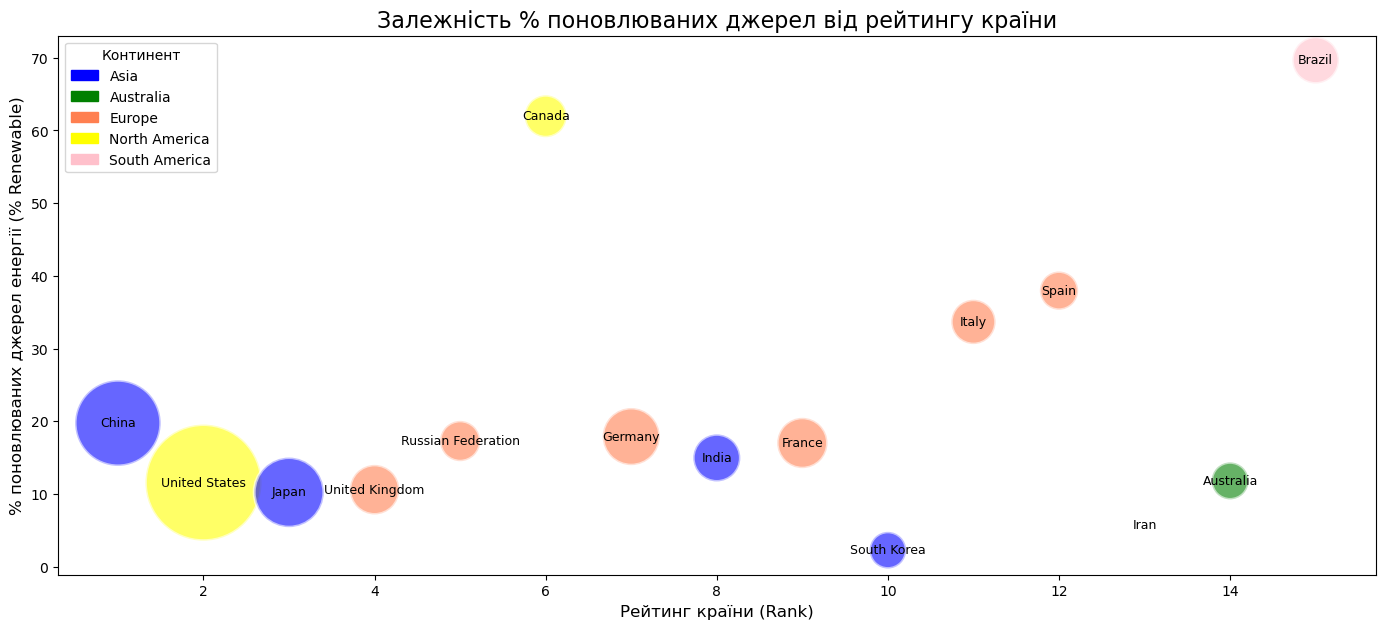

In [405]:
continent_colors = {
    'Asia': 'blue', 'Australia': 'green', 'Europe': 'coral',
    'North America': 'yellow', 'South America': 'pink'
}

# Створюємо бульбашкову діаграму
plt.figure(figsize=(17, 7))

sns.scatterplot(data=merged_df, 
                x='Rank', 
                y='% Renewable', 
                size='2015',
                hue='Continent',
                sizes=(700, 7000),
                palette=continent_colors,
                legend=False, 
                alpha=0.6)

for i in range(len(merged_df)):
    plt.text(merged_df['Rank'].iloc[i], 
             merged_df['% Renewable'].iloc[i], 
             merged_df.index[i],
             fontsize=9, 
             ha='center', 
             va='center', 
             color='black')

handles = [mpatches.Patch(color=color, label=continent) for continent, color in continent_colors.items()]
plt.legend(handles=handles, title='Континент', loc='upper left')

plt.title('Залежність % поновлюваних джерел від рейтингу країни',
          fontsize=16)
plt.xlabel('Рейтинг країни (Rank)', fontsize=12)
plt.ylabel('% поновлюваних джерел енергії (% Renewable)', fontsize=12)

plt.show()